<a href="https://colab.research.google.com/github/fehimkus/tensorflow2_examples/blob/master/keras_deeplizard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPERATION

In [162]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [163]:
train_labels = []
train_samples = []

In [164]:
for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)


In [165]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [166]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

MODEL BUILDING

In [167]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [168]:
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [169]:
#model.summary()

TRAINING

In [170]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [171]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6008 - accuracy: 0.7392 - val_loss: 0.4726 - val_accuracy: 0.8714
Epoch 2/30
189/189 - 0s - loss: 0.3626 - accuracy: 0.9011 - val_loss: 0.2949 - val_accuracy: 0.9190
Epoch 3/30
189/189 - 0s - loss: 0.2745 - accuracy: 0.9296 - val_loss: 0.2607 - val_accuracy: 0.9429
Epoch 4/30
189/189 - 0s - loss: 0.2560 - accuracy: 0.9349 - val_loss: 0.2484 - val_accuracy: 0.9524
Epoch 5/30
189/189 - 0s - loss: 0.2473 - accuracy: 0.9397 - val_loss: 0.2406 - val_accuracy: 0.9429
Epoch 6/30
189/189 - 0s - loss: 0.2414 - accuracy: 0.9429 - val_loss: 0.2357 - val_accuracy: 0.9429
Epoch 7/30
189/189 - 0s - loss: 0.2368 - accuracy: 0.9455 - val_loss: 0.2323 - val_accuracy: 0.9429
Epoch 8/30
189/189 - 0s - loss: 0.2335 - accuracy: 0.9455 - val_loss: 0.2269 - val_accuracy: 0.9524
Epoch 9/30
189/189 - 0s - loss: 0.2315 - accuracy: 0.9439 - val_loss: 0.2277 - val_accuracy: 0.9429
Epoch 10/30
189/189 - 0s - loss: 0.2281 - accuracy: 0.9413 - val_loss: 0.2228 - val_accuracy: 0.9524

PREDICTION

In [172]:
predictions = model.predict(x = scaled_train_samples, batch_size=10, verbose=0)

In [173]:
rounded_predictions = np.argmax(predictions, axis=-1)
#for i in rounded_predictions:
  #print(i)

CONFUSION MATRIX AND VISUALIZATION

In [174]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [175]:
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)

In [176]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap= plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks =np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm=cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)
  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment= 'center',
             color= 'white' if cm[i, j]> thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1000   50]
 [  50 1000]]


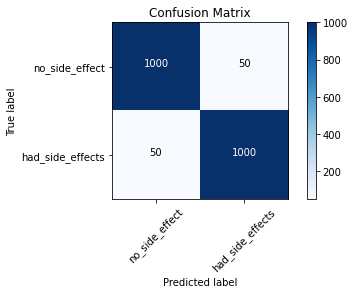

In [177]:
cm_plot_labels = ['no_side_effect', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

SAVE ALL MODEL

In [178]:
#from tensorflow.keras.models import load_model
#new_model = load_model('<<local path>>.h5')

In [179]:
#new_model.summary()

SAVE ONLY WEIGHTS

In [180]:
#Write a location on your local disk and define a file name
#import os.path
#if os.path.isfile('<<file_path/file_name.h5>>') is False:
  #model.save_weights('<<file_path/file_name.h5>>')

In [181]:
#defining another model to save weights and remove the # character
#model2 = Sequential([
                    #Dense(units=16, input_shape=(1,), activation='relu'),
                    #Dense(units=32, activation='relu'),
                    #Dense(units=2, activation='softmax')
#])

In [182]:
#model2.load_weights('<<file_path/file_name.h5>>')

In [183]:
#model2.get_weights()